<a href="https://colab.research.google.com/github/MorawoLekanDavid/ML_projects/blob/main/financial_inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
train_filepath = '/content/financial data/Train.csv'
test_filepath = '/content/financial data/Test.csv'
train_df = pd.read_csv(train_filepath)
test_df = pd.read_csv(test_filepath)
train_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
train_df.value_counts('bank_account')

,count
bank_account,
No,20212
Yes,3312


In [24]:
X_train = train_df.drop(columns = 'bank_account', errors = 'ignore')
y_train = train_df['bank_account']


In [26]:
cat_df = X_train.select_dtypes(include = ['object'])
cat_df = cat_df.drop(columns = 'uniqueid', axis=1)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   location_type           23524 non-null  object
 2   cellphone_access        23524 non-null  object
 3   gender_of_respondent    23524 non-null  object
 4   relationship_with_head  23524 non-null  object
 5   marital_status          23524 non-null  object
 6   education_level         23524 non-null  object
 7   job_type                23524 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


In [27]:
num_df = X_train.select_dtypes(include = ['int64'])
num_df.head()

,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26


In [28]:
num_df['age_of_respondent'].describe()

,age_of_respondent
count,23524.000000
mean,38.805220
std,16.520569
min,16.000000
25%,26.000000
50%,35.000000
75%,49.000000
max,100.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

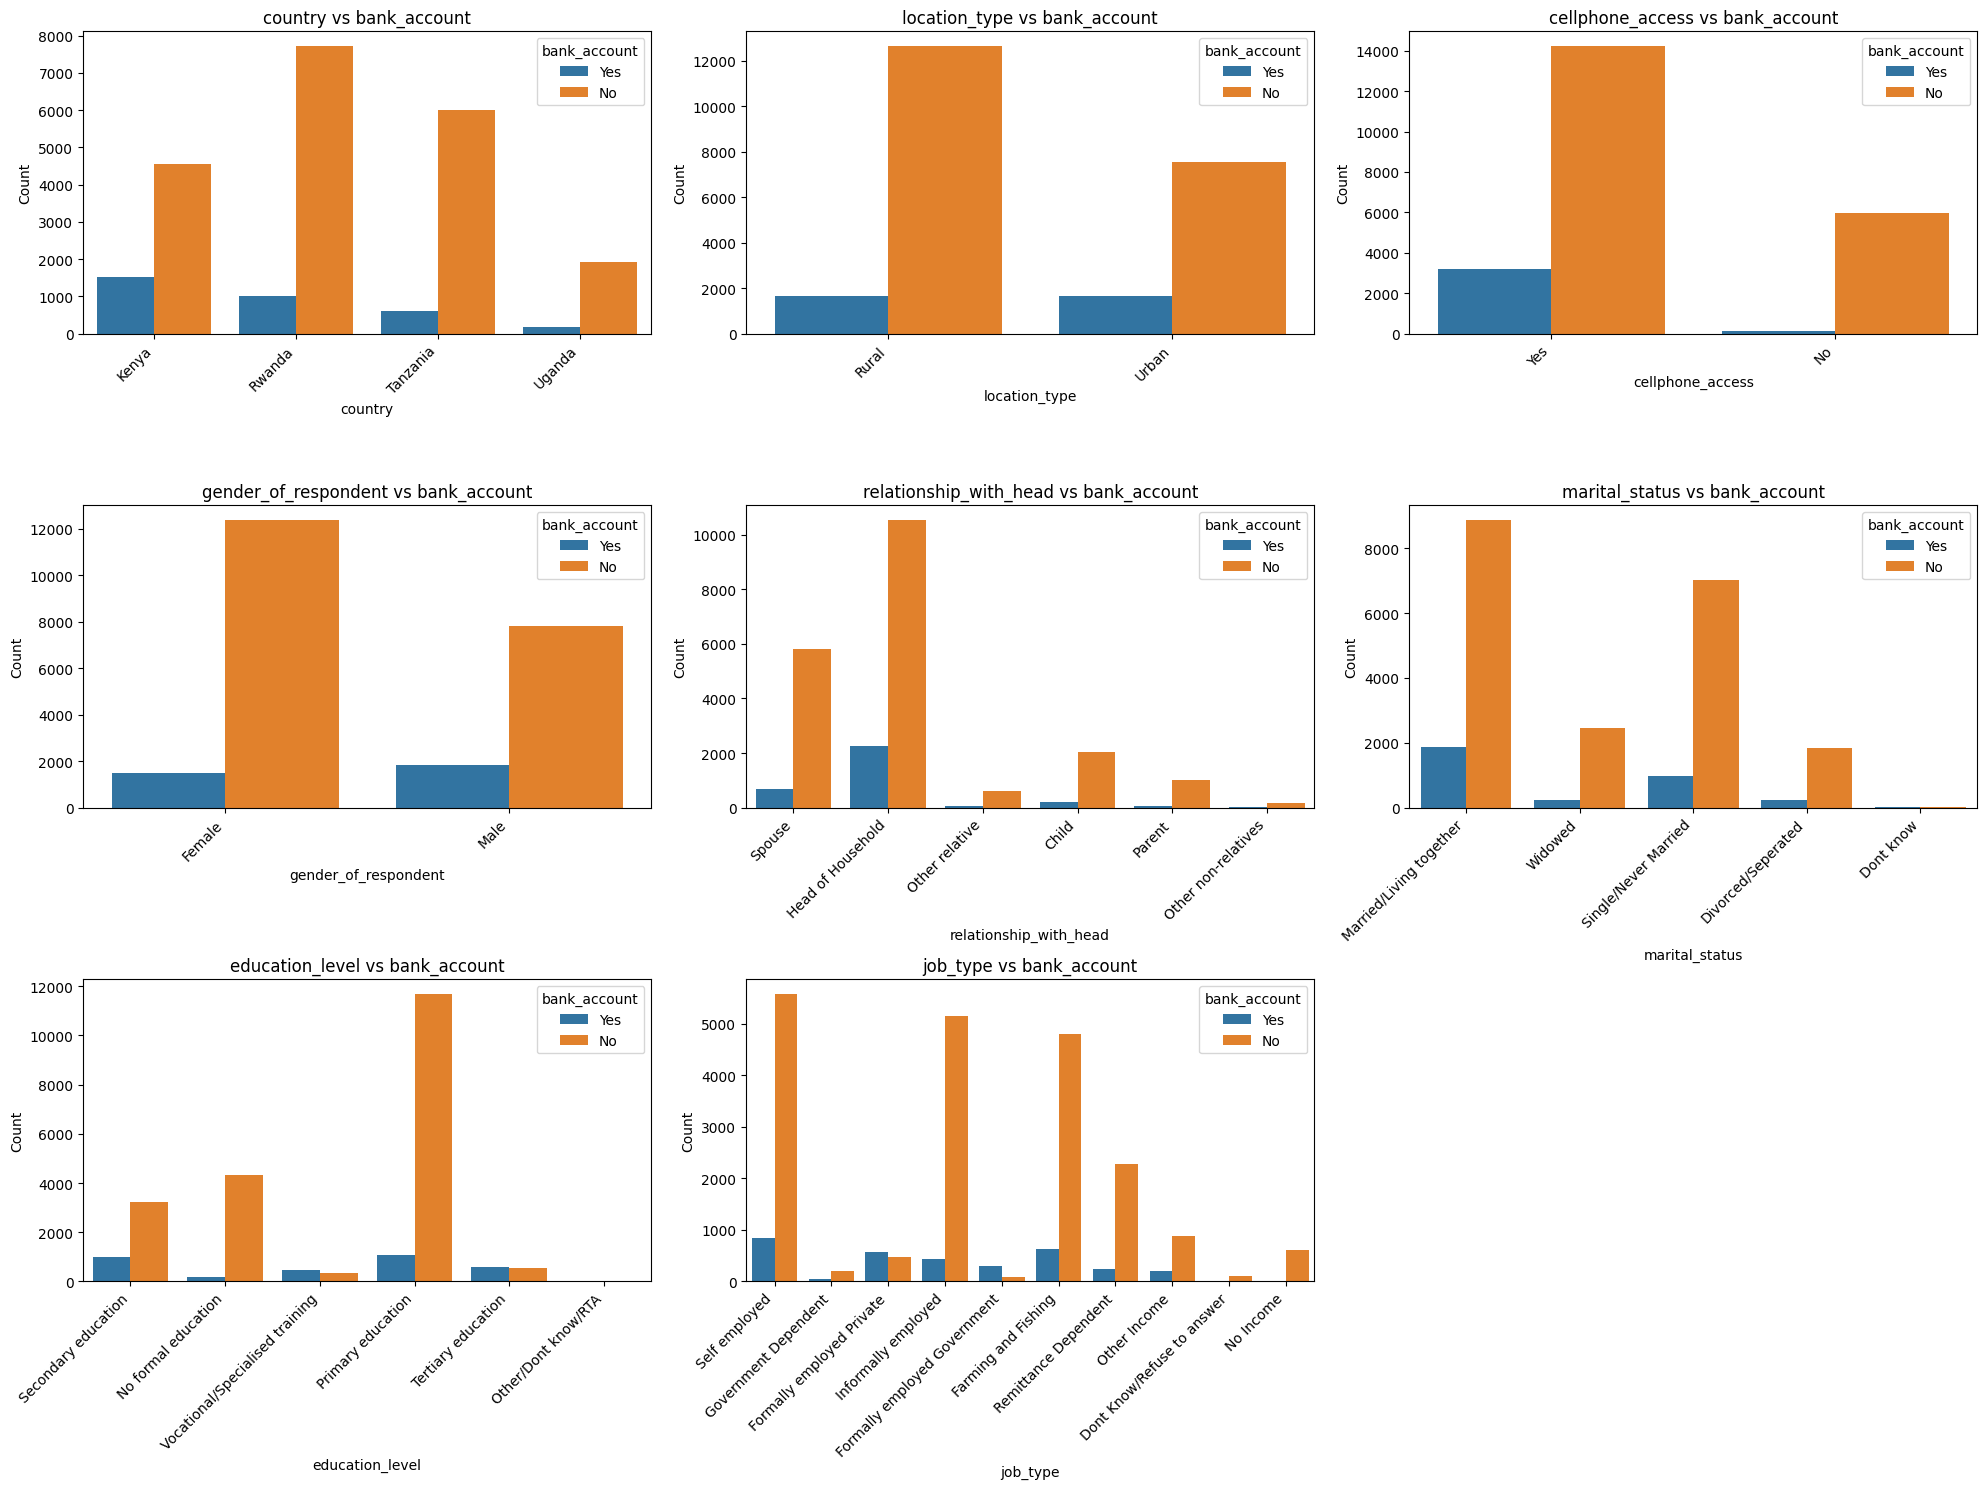

In [30]:

# We visualize each categorical variable with HeartDisease
plt.figure(figsize=(20, 15))

for i, feature in enumerate(cat_df, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=cat_df, x=feature, hue=y_train)
    plt.title(f'{feature} vs bank_account')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [33]:
categorical_analysis = {}

for feature in cat_df:
    cross_tab = pd.crosstab(X_train[feature], train_df['bank_account'], normalize='index')
    categorical_analysis[feature] = cross_tab


# Let's convert the analysis results of categorical variables into a DataFrame
categorical_analysis_df = pd.concat(categorical_analysis.values(), keys=categorical_analysis.keys())
categorical_analysis_df

bank_account                                                  No       Yes
country                Kenya                            0.749341  0.250659
                       Rwanda                           0.885175  0.114825
                       Tanzania                         0.908308  0.091692
                       Uganda                           0.913851  0.086149
location_type          Rural                            0.883497  0.116503
                       Urban                            0.821261  0.178739
cellphone_access       No                               0.982867  0.017133
                       Yes                              0.816203  0.183797
gender_of_respondent   Female                           0.893205  0.106795
                       Male                             0.810304  0.189696
relationship_with_head Child                            0.913414  0.086586
                       Head of Household                0.822851  0.177149
                       Other non-relatives              0.894737  0.105263
                       Other relative                   0.901198  0.098802
                       Parent                           0.940147  0.059853
                       Spouse                           0.893405  0.106595
marital_status         Divorced/Seperated               0.887283  0.112717
                       Dont know                        0.750000  0.250000
                       Married/Living together          0.826402  0.173598
                       Single/Never Married             0.878993  0.121007
                       Widowed                          0.909897  0.090103
education_level        No formal education              0.961019  0.038981
                       Other/Dont know/RTA              0.685714  0.314286
                       Primary education                0.914549  0.085451
                       Secondary education              0.767227  0.232773
                       Tertiary education               0.489196  0.510804
                       Vocational/Specialised training  0.429639  0.570361
job_type               Dont Know/Refuse to answer       0.888889  0.111111
                       Farming and Fishing              0.883294  0.116706
                       Formally employed Government     0.224806  0.775194
                       Formally employed Private        0.458768  0.541232
                       Government Dependent             0.797571  0.202429
                       Informally employed              0.920493  0.079507
                       No Income                        0.979266  0.020734
                       Other Income                     0.818519  0.181481
                       Remittance Dependent             0.905026  0.094974
                       Self employed                    0.868262  0.131738

In [34]:
num_df.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


In [35]:
from scipy import stats
z_scores = np.abs(stats.zscore(num_df))  # Replace df with your DataFrame
outliers = np.where(z_scores > 3)  # Index of outliers
print(outliers)

(array([   58,   209,   340,   348,   370,   372,   483,   507,   674,
         681,   814,   823,   879,   931,  1148,  1389,  1403,  1434,
        1482,  1486,  1493,  1555,  1599,  1833,  1851,  1893,  1933,
        1988,  1999,  2121,  2207,  2285,  2373,  2436,  2593,  2599,
        2648,  2665,  2766,  2879,  2886,  2911,  2977,  2979,  2987,
        2988,  3030,  3044,  3081,  3086,  3114,  3289,  3346,  3370,
        3467,  3691,  3761,  3770,  3849,  3912,  3979,  4045,  4078,
        4158,  4198,  4224,  4343,  4392,  4479,  4582,  4840,  4896,
        4928,  5104,  5114,  5199,  5222,  5225,  5286,  5305,  5307,
        5309,  5387,  5461,  5640,  5676,  5784,  5887,  6025,  6051,
        6076,  6119,  6127,  6221,  6503,  6628,  6671,  6719,  6809,
        6966,  6984,  7031,  7346,  7457,  7527,  7561,  7750,  7988,
        8089,  8228,  8274,  8441,  8606,  8766,  9181,  9268,  9358,
        9402,  9420,  9444,  9512,  9754,  9755,  9859, 10470, 10589,
       10776, 10791

In [36]:
# Using custom transformer to detect outliers and replace the outliers with the median
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
import numpy as np

# Custom transformer to replace outliers with the median
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=3):  # Factor defines the boundary of the outlier on Z-table
        self.factor = factor

    def fit(self, X, y=None):
        # Compute the median for each feature
        self.median_ = np.median(X, axis=0)
        return self

    def transform(self, X):
        z_scores = np.abs(stats.zscore(X))  # Replace df with your DataFrame
        X_out = np.where((z_scores > self.factor), self.median_, X)
        return X_out

In [40]:
from sklearn.preprocessing import LabelEncoder
# Convert target label to numerical Data
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train[:5]

array([1, 0, 1, 0, 0])

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown = 'ignore'))
num_pipeline = make_pipeline(OutlierRemover(), SimpleImputer(strategy = 'median'), StandardScaler())

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_columns = cat_df.select_dtypes(include=['object']).columns
num_columns = num_df.select_dtypes(include=['int64']).columns
preprocessor = ColumnTransformer(
    transformers= [
    ('cat', cat_pipeline, cat_columns),
    ('num',num_pipeline,num_columns)
  ]
)
X_train_encoded = preprocessor.fit_transform(X_train)

In [46]:
num_feature_names = num_columns
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehotencoder'].get_feature_names_out(cat_columns)
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Creating the DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=all_feature_names, index=X_train.index)

# Check the transformed DataFrame
X_train_encoded.head()

ValueError: Shape of passed values is (23524, 1), indices imply (23524, 40)